<a href="https://colab.research.google.com/github/utkuyucel/Deep-Learning/blob/master/Trying_new_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import cifar10
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Activation
from keras.models import Sequential, load_model
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
num_classes = 10

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train, X_test = X_train.astype("float32"), X_test.astype("float32")

X_train, X_test = X_train / 255.0, X_test / 255.0

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 18s 0us/step


In [0]:
model = Sequential()

model.add(Conv2D(256, (2,2), input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(512, (2,2)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(1024, (3,3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(512, (3,3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(256, (2,2)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(512, (2,2)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(512,(2,2)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(256, (2,2)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (2,2)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(2048))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Dense(num_classes))
model.add(Activation("softmax"))



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 31, 256)       3328      
_________________________________________________________________
activation_1 (Activation)    (None, 31, 31, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 512)       524800    
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 512)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 512)       2048      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 1024)      4719616   
__________

In [0]:
#model = load_model("model.h5")
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])


In [0]:
history = model.fit(X_train, y_train, epochs = 15, validation_data = (X_test, y_test))


Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 288s 6ms/step - loss: 1.5641 - acc: 0.4332 - val_loss: 1.5309 - val_acc: 0.4903
Epoch 2/15
50000/50000 [==============================] - 276s 6ms/step - loss: 1.1490 - acc: 0.6007 - val_loss: 1.1588 - val_acc: 0.6138
Epoch 3/15
50000/50000 [==============================] - 275s 6ms/step - loss: 0.9549 - acc: 0.6729 - val_loss: 1.0655 - val_acc: 0.6484
Epoch 4/15
50000/50000 [==============================] - 274s 5ms/step - loss: 0.8294 - acc: 0.7203 - val_loss: 1.0712 - val_acc: 0.6389
Epoch 5/15
50000/50000 [==============================] - 273s 5ms/step - loss: 0.7281 - acc: 0.7567 - val_loss: 0.7573 - val_acc: 0.7454
Epoch 6/15
50000/50000 [==============================] - 272s 5ms/step - loss: 0.6305 - acc: 0.7886 - val_loss: 0.7390 - val_acc: 0.7552
Epoch 7/15
50000/50000 [==============================] - 271s 5ms/step - 

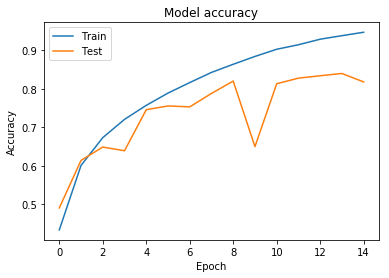

In [0]:
import matplotlib.pyplot as plt
# history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test), verbose = 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.save("model.h5")